# Time series values for Rjúpnasalir pumpstation

In [19]:
import matplotlib.pyplot as plt
import pandas as pd

In [20]:
df_pressure = pd.read_excel("data/H-KOP-RS-ÞS212.xlsx")
df_pressure.drop(columns=["mpoint_id","mpoint_name","aggregate_name","aggregate_id","flag","quality_description","event_time"],inplace=True)
df_pressure.head()



,start_time,value
0,2022-03-13 09:00:00,7.8
1,2022-03-14 23:00:00,7.8
2,2022-03-13 16:00:00,7.8
3,2022-03-08 02:00:00,7.8
4,2022-03-08 03:00:00,7.8


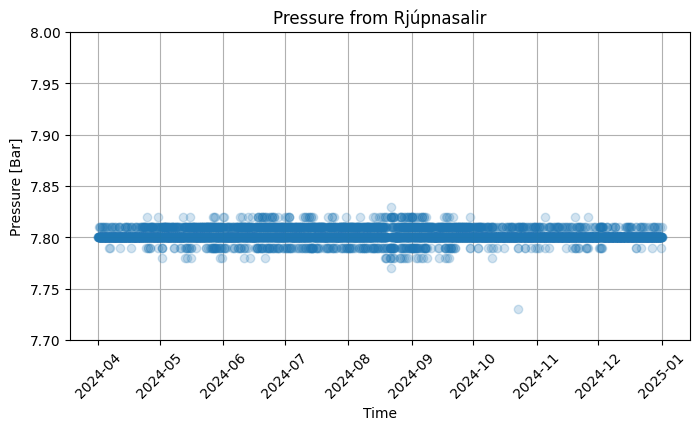

In [37]:
# Convert 'start_time' to datetime format
df_pressure['start_time'] = pd.to_datetime(df_pressure['start_time'], errors='coerce')

# Filter for July 2024
df_filtered = df_pressure[(df_pressure['start_time'].dt.year == 2024) & (df_pressure['start_time'].dt.month > 3)]

# Plot the values with more opacity and no line between them
plt.figure(figsize=(8, 4))
plt.plot(df_filtered['start_time'], df_filtered['value'], marker='o', linestyle='', alpha=0.2)  # Alpha controls opacity
plt.xlabel('Time')
plt.ylabel('Pressure [Bar]')
plt.title('Pressure from Rjúpnasalir')  # Update the title for July
plt.grid(True)
plt.xticks(rotation=45)
plt.ylim([7.7, 8])  # Set y-range from 0 to 100 (adjust as needed)


plt.show()


In [32]:
df_flow = pd.read_excel("data/H-KOP-RS-RS212.xlsx")
df_flow.drop(columns=["mpoint_id","mpoint_name","aggregate_name","aggregate_id","flag","quality_description","event_time"],inplace=True)
df_flow.head()

,start_time,value
0,2022-03-13 09:00:00,68.39
1,2022-03-14 23:00:00,64.47
2,2022-03-13 16:00:00,64.36
3,2022-03-08 02:00:00,63.76
4,2022-03-08 03:00:00,62.39


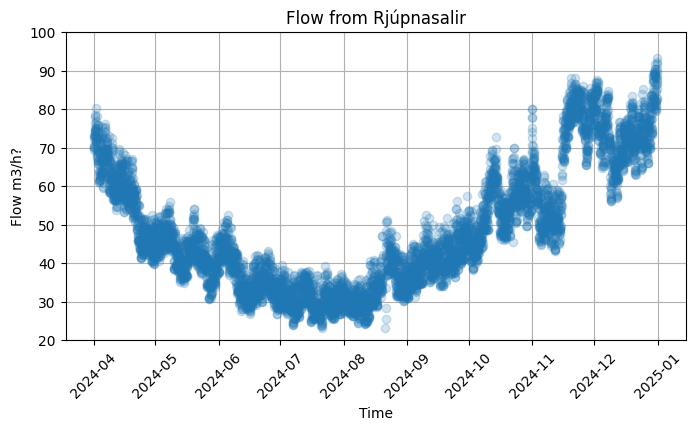

In [35]:
# Convert 'start_time' to datetime format
df_flow['start_time'] = pd.to_datetime(df_flow['start_time'], errors='coerce')

# Filter for July 2024
df_june_2024 = df_flow[(df_flow['start_time'].dt.year == 2024) & (df_flow['start_time'].dt.month > 3)]

# Plot the values with more opacity and no line between them
plt.figure(figsize=(8, 4))
plt.plot(df_june_2024['start_time'], df_june_2024['value'], marker='o', linestyle='', alpha=0.2)  # Alpha controls opacity
plt.xlabel('Time')
plt.ylabel('Flow m3/h?')
plt.title('Flow from Rjúpnasalir')  # Update the title for July
plt.grid(True)
plt.xticks(rotation=45)
plt.ylim([20, 100])  # Set y-range from 0 to 100 (adjust as needed)


plt.show()
